In [21]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
lines = {}
with open("/Users/anokhin/Desktop/presents_20151x_N_1M.txt") as tlf:    
    n_lines_read = 0
    for line in tlf:
        uid, json_str = line.strip().split("\t")
        
#         if uid.startswith("B:"):
#             continue
        
        json = ujson.loads(json_str)        
        
        for day, stats in json:
            date = dt.datetime.strptime(day, "%Y%m%d").date()            
            data = lines.get(date, {"date": date})
            
            for price_str, count in stats.iteritems():
                price = int(price_str)
                data[price] = data.get(price, 0) + count
                
            lines[date] = data
            
        n_lines_read += 1
        if n_lines_read > 250000:
            break

df = pd.DataFrame(lines.values(), columns=['date'] + range(1, 101)).set_index(['date']).sort_index().fillna(0).T

df.head()

date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2015-06-21,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-27,2015-06-28,2015-06-29,2015-06-30
1,158326,28727,14068,47023,81412,200756,194501,31199,23787,13463,...,93421,81655,98641,62149,71320,87597,89022,101006,71792,76436
2,0,36407,33265,18245,31445,134168,31416,25767,36682,34372,...,10851,8496,8334,7310,8988,6407,13837,9429,13215,5479
3,0,0,0,0,0,0,0,0,0,0,...,7701,2916,2804,7139,5091,2367,1384,1693,3482,2034
4,0,881,778,1888,2027,23,4626,4084,2251,2432,...,18,932,1127,964,18,22,1070,1778,1139,446
5,6827,10431,10457,9566,21738,11905,4480,7427,5269,6738,...,4194,4310,1389,1500,5034,3802,2614,1897,2127,3073


In [27]:
ingnored_dates = [dt.date(2015, 3, 7), dt.date(2015, 3, 8), dt.date(2015, 2, 13), dt.date(2015, 2, 14), dt.date(2015, 1, 6), dt.date(2015, 1, 7), dt.date(2015, 4, 11), 
                  dt.date(2015, 4, 12), dt.date(2015, 2, 22), dt.date(2015, 2, 23), dt.date(2015, 5, 8), dt.date(2015, 5, 9), dt.date(2015, 1, 25), dt.date(2015, 1, 18), 
                  dt.date(2015, 1, 19), dt.date(2015, 3, 31), dt.date(2015, 4, 1), dt.date(2015, 6, 20), dt.date(2015, 6, 21), dt.date(2015, 7, 8), dt.date(2015, 5, 11), 
                  dt.date(2015, 5, 12), dt.date(2015, 7, 11), dt.date(2015, 1, 13), dt.date(2015, 1, 14), dt.date(2015, 4, 30), dt.date(2015, 5, 1), dt.date(2015, 11, 29), 
                  dt.date(2015, 2, 20), dt.date(2015, 10, 5), dt.date(2015, 5, 15), dt.date(2015, 3, 26), dt.date(2015, 5, 28), dt.date(2015, 10, 25), dt.date(2015, 1, 1), 
                  dt.date(2015, 11, 10), dt.date(2015, 11, 21), dt.date(2015, 9, 1), dt.date(2015, 6, 1), dt.date(2015, 7, 25), dt.date(2015, 6, 12), dt.date(2015, 8, 9), 
                  dt.date(2015, 2, 17), dt.date(2015, 9, 27), dt.date(2015, 7, 31), dt.date(2015, 3, 27), dt.date(2015, 9, 28)]

df.drop([d for d in ingnored_dates if d in df.columns], axis=1, inplace=True)

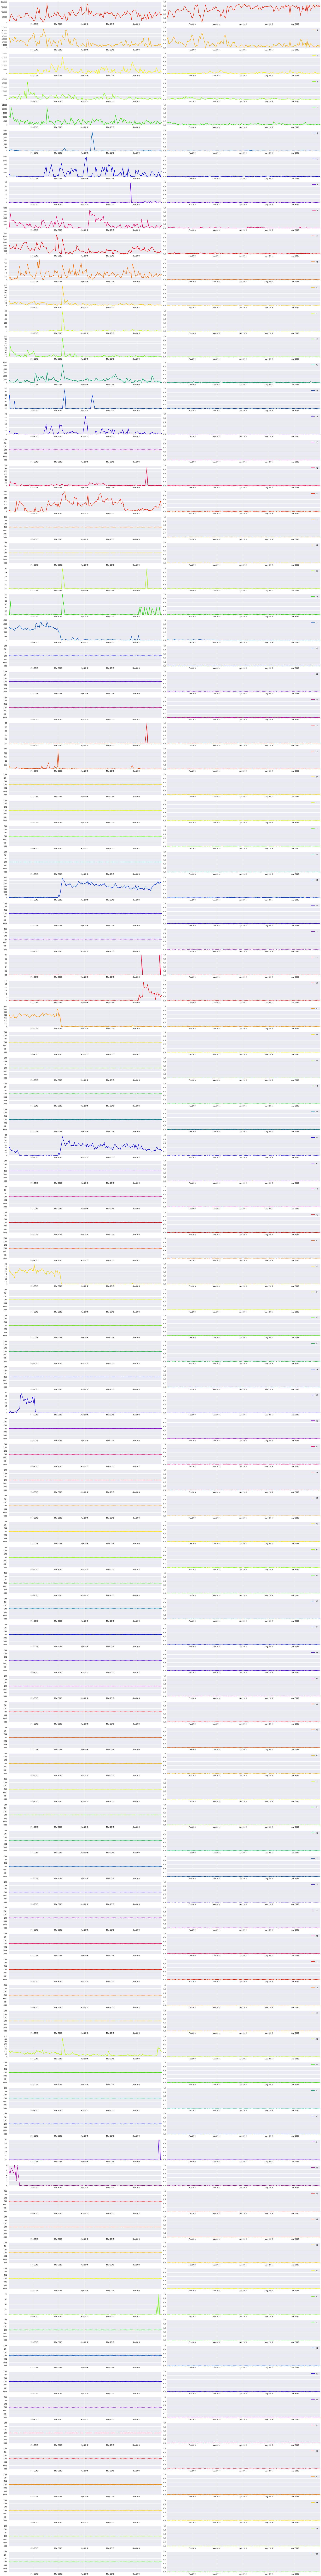

In [28]:
pl.figure(figsize=(25, 2*df.shape[0]))

cm = pl.get_cmap('prism')
for i, row in df.iterrows():
    pl.subplot(df.shape[0], 2, 2 * i - 1)
    pl.plot(row.index, row.values, '.-', color=cm(int(i * 1.0 / df.shape[0] * 256)), label=i)
    pl.subplot(df.shape[0], 2, 2 * i)
    pl.plot(row.index, row.values / df.sum(axis=0), '.-', color=cm(int(i * 1.0 / df.shape[0] * 256)), label=i)
    pl.legend()
    pl.ylim(0, 1)
pl.tight_layout()
pl.show()

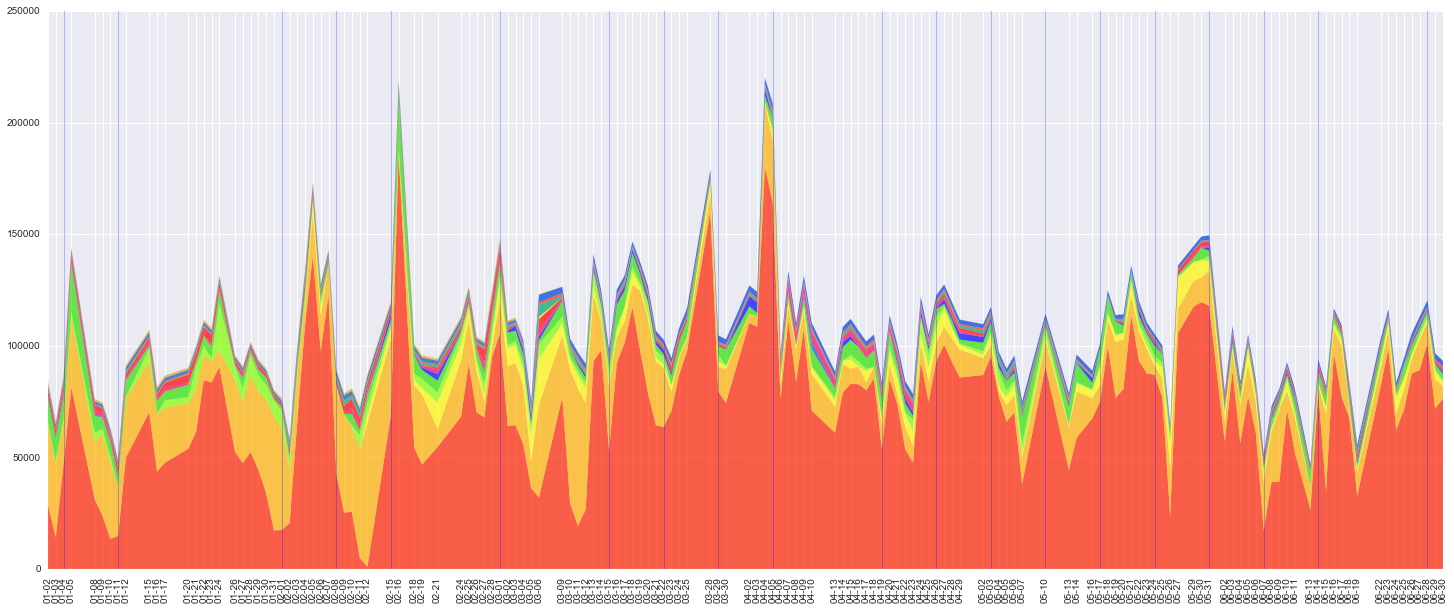

In [29]:
pl.figure(figsize=(25, 10))
pl.stackplot(df.columns, df.values, baseline='zero', colors=[cm(int((i + 1) * 1.0 / df.shape[0] * 256)) for i in xrange(df.shape[0])], lw=0, alpha=0.7)
for col in df.columns:
    if col.weekday() == 6:        
        pl.axvline(x=col, lw=1, alpha=0.3)
pl.xticks(df.columns, [d.strftime("%m-%d") for d in df.columns], rotation='vertical')
pl.show()

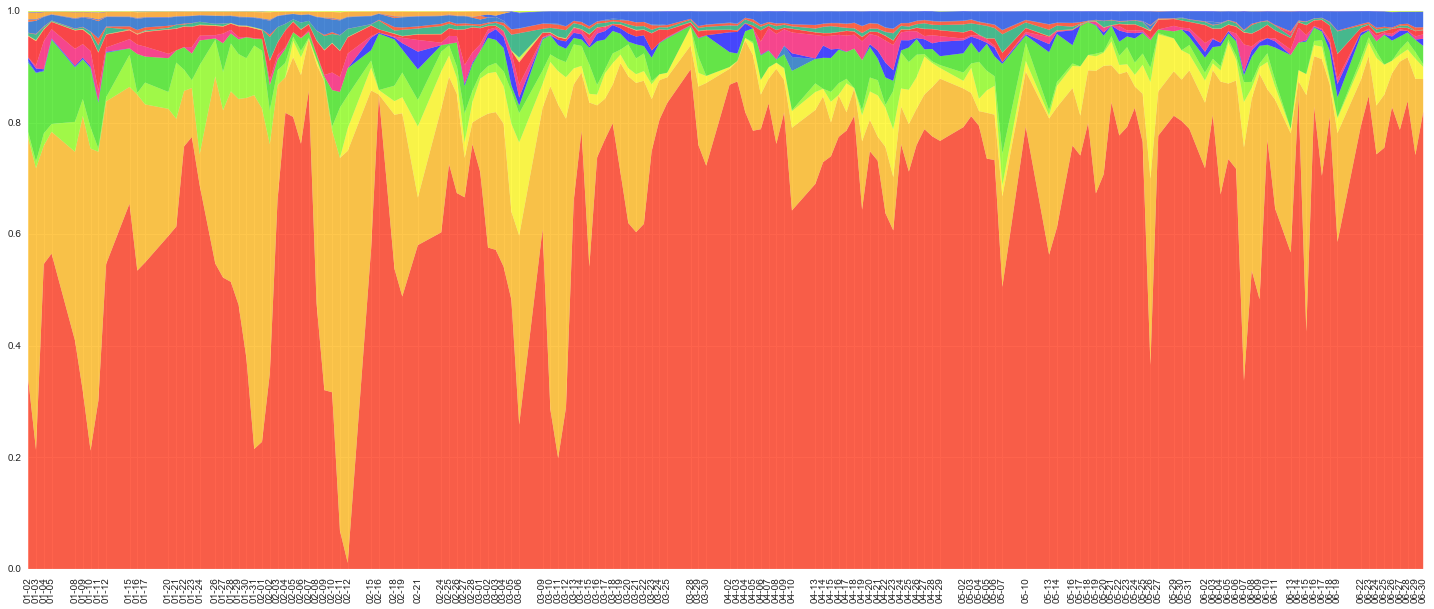

In [30]:
pl.figure(figsize=(25, 10))
pl.stackplot(df.columns, df.values / df.values.sum(axis=0), baseline='zero', colors=[cm(int((i + 1) * 1.0 / df.shape[0] * 256)) for i in xrange(df.shape[0])], lw=0, alpha=0.7)
pl.ylim(0,1)
pl.xticks(df.columns, [d.strftime("%m-%d") for d in df.columns], rotation='vertical')
pl.show()